# Description 

Company XYZ is an e-commerce site that sells hand-made clothes. You have to build a model that predicts whether a user has a high probability of using the site to perform some illegal activity or not. This is a super common task for data scientists. 

You only have information about the user first transaction on the site and based on that you have to make your classification ("fraud/no fraud"). 

These are the tasks you are asked to do: 

For each user, determine her country based on the numeric IP address. 

Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model. 

Your boss is a bit worried about using a model she doesn't understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn't care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? What are their characteristics? 

Let's say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?


In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
f1 = 'data/Fraud_Data.csv'
f2 = 'data/IpAddress_to_Country.csv'
df_frau = pd.read_csv(f1)
df_ip   = pd.read_csv(f2)

In [4]:
print('Shape df_Frau ', df_frau.shape)
df_frau.head()

Shape df_Frau  (151112, 11)


user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [5]:
print('Shape df_IP ', df_ip.shape)
df_ip

Shape df_IP  (138846, 3)


lower_bound_ip_address  upper_bound_ip_address    country
0                 1.677722e+07                16777471  Australia
1                 1.677747e+07                16777727      China
2                 1.677773e+07                16778239      China
3                 1.677824e+07                16779263  Australia
4                 1.677926e+07                16781311      China
...                        ...                     ...        ...
138841            3.758092e+09              3758093311  Hong Kong
138842            3.758093e+09              3758094335      India
138843            3.758095e+09              3758095871      China
138844            3.758096e+09              3758096127  Singapore
138845            3.758096e+09              3758096383  Australia

[138846 rows x 3 columns]

In [6]:
print('Number of device ID in this list ',len(df_frau['device_id'].unique()))
print('Number of user ID in this list ',len(df_frau['user_id'].unique()))

Number of device ID in this list  137956
Number of user ID in this list  151112


In [9]:
# Combine country to dataset which match country with ip address
def add_country(ip_ad):
    countries=df_ip.loc[ (df_ip['upper_bound_ip_address'] >= ip_ad) & (df_ip['lower_bound_ip_address'] <= ip_ad),'country'].values
    #Account for nulls
    if len(countries)==0:
        return np.nan
    return countries[0]

In [12]:
#Warning: this takes  time to run
# df_frau['country']=df_frau.ip_address.map(add_country)
df_frau.head()

user_id          signup_time        purchase_time  purchase_value  \
34321    226648  2015-05-12 16:00:31  2015-06-13 23:42:18              45   
57616    103319  2015-02-05 22:20:04  2015-03-29 00:39:07              94   
46520     36633  2015-05-10 00:49:53  2015-07-22 03:18:01              46   
136484   271176  2015-01-01 04:25:25  2015-01-01 04:25:26              57   
107401    77511  2015-01-01 04:25:31  2015-01-01 04:25:32              57   

            device_id  source  browser sex  age    ip_address  class  \
34321   AAALBGNHHVMKG  Direct   Chrome   M   34  2.494581e+09      0   
57616   AAAWIHVCQELTP     Ads   Chrome   M   29  8.092637e+08      0   
46520   AAAXJHWCLISKY     Ads       IE   M   40  2.891497e+06      0   
136484  AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      1   
107401  AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      1   

               country  
34321   United Kingdom  
57616    United States  
46520              NaN  
136484  United Kingdom  
107401  United Kingdom

In [26]:
# save to file
# df_frau.to_csv('data/fraud_w_country.csv')
# df = df_frau

In [13]:
df = pd.read_csv('Frau Detection/data/fraud_w_country.csv')
df = df.drop(df.columns[0], axis = 1)

# Step 1 :Exploring Data

In [7]:
df.describe()

user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [8]:
# Xem thu nhung thiet bi nao co 2 user id tro len
df.sort_values('device_id',inplace=True)
df[df['device_id'].duplicated()]

user_id          signup_time        purchase_time  purchase_value  \
12       209275  2015-01-01 04:25:21  2015-01-28 10:39:35              57   
11       325729  2015-01-01 04:25:22  2015-01-01 04:25:23              57   
10       314594  2015-01-01 04:25:29  2015-01-01 04:25:30              57   
9         64674  2015-01-01 04:25:23  2015-01-01 04:25:24              57   
8        190872  2015-01-01 04:25:30  2015-01-01 04:25:31              57   
...         ...                  ...                  ...             ...   
151042    27633  2015-01-07 09:04:09  2015-01-07 09:04:10              84   
151041   151592  2015-01-07 09:04:13  2015-01-07 09:04:14              84   
151046   269420  2015-01-07 09:04:10  2015-01-07 09:04:11              84   
151072   271121  2015-01-21 10:16:22  2015-03-05 08:43:58              46   
151100   364653  2015-02-28 11:45:25  2015-06-19 11:48:16              26   

            device_id  source  browser sex  age    ip_address  class  \
12      AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      0   
11      AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      1   
10      AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      1   
9       AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      1   
8       AAAXXOZJRZRAO     Ads  FireFox   F   36  1.377849e+09      1   
...               ...     ...      ...  ..  ...           ...    ...   
151042  ZZQPVRBHRMVYD  Direct   Safari   F   28  1.136982e+09      1   
151041  ZZQPVRBHRMVYD  Direct   Safari   F   28  1.136982e+09      1   
151046  ZZQPVRBHRMVYD  Direct   Safari   F   28  1.136982e+09      1   
151072  ZZUBRTQITHWAO     Ads       IE   M   41  2.216457e+09      1   
151100  ZZYPLUFCXTHUS     Ads   Chrome   M   24  1.201034e+09      0   

               country  
12      United Kingdom  
11      United Kingdom  
10      United Kingdom  
9       United Kingdom  
8       United Kingdom  
...                ...  
151042   United States  
151041   United States  
151046   United States  
151072   United States  
151100   United States  

[13156 rows x 12 columns]

In [60]:
#check NA value
df.isna().sum()

Unnamed: 0            0
user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
country           21966
dtype: int64

We see country feature have null value 

In [61]:
# check su chenh lech du lieu voi giao dich fraud va that
df['class'].value_counts(normalize = True)

0    0.906354
1    0.093646
Name: class, dtype: float64

In [62]:
def make_barplot(col,x,y):
    plt.figure(figsize=(x,y))
    ax = sns.barplot(df[col].unique(),df[col].value_counts())
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+100),fontsize=12)
    ax.set_title("Unqiue Values and Counts of " + col[0].upper() + col[1:],fontsize=14)

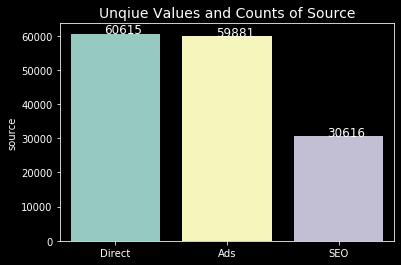

In [63]:
make_barplot('source',6,4)

In [64]:
make_barplot('browser',6,4)

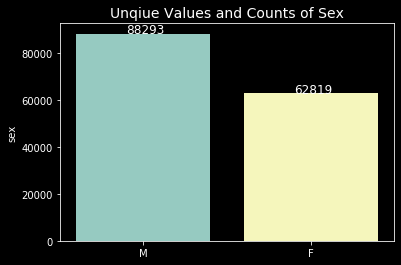

In [65]:
make_barplot('sex',6,4)

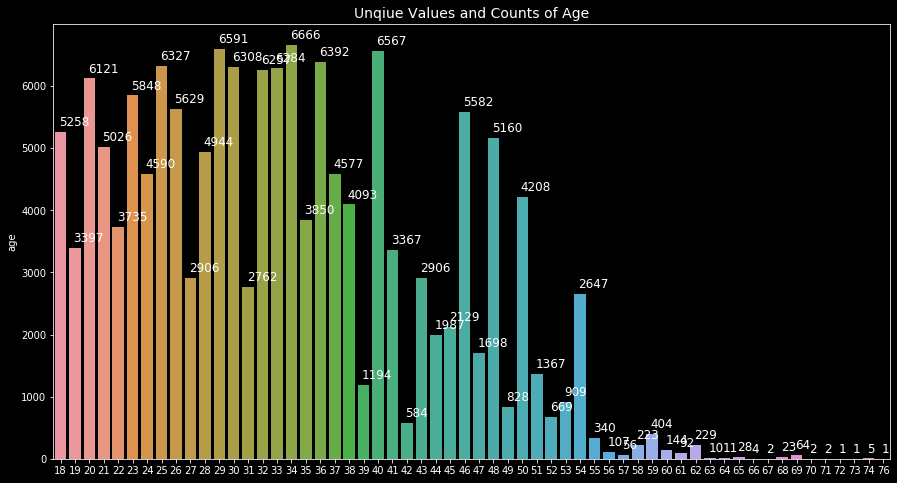

In [66]:
make_barplot('age',15,8)

(array([5.6680e+03, 7.1020e+03, 8.6830e+03, 1.0104e+04, 1.1430e+04,
        1.2611e+04, 1.2983e+04, 1.3233e+04, 1.2565e+04, 1.1750e+04,
        1.0284e+04, 8.7850e+03, 7.2470e+03, 5.5530e+03, 2.1290e+03,
        3.6850e+03, 2.5610e+03, 1.7370e+03, 1.2530e+03, 7.4400e+02,
        4.5200e+02, 2.5100e+02, 1.5600e+02, 8.4000e+01, 3.4000e+01,
        1.5000e+01, 6.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([18.        , 19.93333333, 21.86666667, 23.8       , 25.73333333,
        27.66666667, 29.6       , 31.53333333, 33.46666667, 35.4       ,
        37.33333333, 39.26666667, 41.2       , 43.13333333, 45.06666667,
        47.        , 48.93333333, 50.86666667, 52.8       , 54.73333333,
        56.66666667, 58.6       , 60.53333333, 62.46666667, 64.4       ,
        66.33333333, 68.26666667, 70.2       , 72.13333333, 74.06666667,
        76.        ]),
 <a list of 30 Patch objects>)

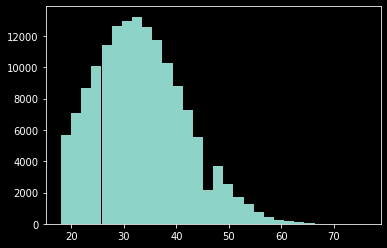

In [67]:
plt.hist(df['age'],bins=30,histtype='bar')

In [68]:
#chuyen signup time and purchase time to datatime
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [69]:
df['signup_time'].min(), df['signup_time'].max()

(Timestamp('2015-01-01 00:00:42'), Timestamp('2015-08-18 04:40:29'))

Time register from 1-1-2015 to 18-8-2015 (8 months)

In [70]:
df['purchase_time'].min(), df['purchase_time'].max()

(Timestamp('2015-01-01 00:00:44'), Timestamp('2015-12-16 02:56:05'))

Purchase time from 1-1-2015 to 16-12-2015

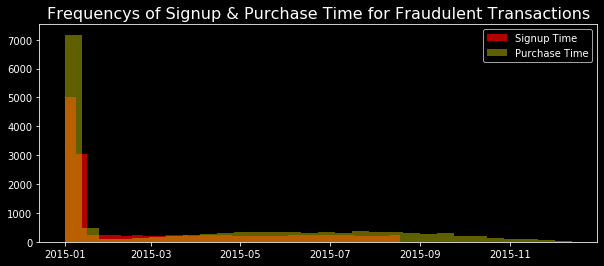

In [71]:
plt.figure(figsize=(10,4))
plt.hist(df['signup_time'][df['class']==1],bins=30,alpha=0.7, label="Signup Time",color='r')
plt.hist(df['purchase_time'][df['class']==1],bins=30,alpha=0.5,label="Purchase Time",color='y')
plt.title("Frequencys of Signup & Purchase Time for Fraudulent Transactions",fontsize=16)
plt.legend()

In [72]:
plt.figure(figsize=(10,4))
plt.hist(df['signup_time'][df['class']==0],bins=30,alpha=0.7, label="Signup Time",color='r')
plt.hist(df['purchase_time'][df['class']==0],bins=30,alpha=0.5,label="Purchase Time",color='y')
plt.title("Frequencys of Signup & Purchase Time for Fraudulent Transactions",fontsize=16)
plt.legend()

Observe Relationship between Country and Fraudulent Transactions:

In [73]:
#Total Transactions 
totals_by_country = df[['country','class']].groupby('country').count().sort_values('class',ascending=False)
#tota_by_country

#Fraudulent Transactions by country
fraud_by_country = df[['country','class']][df['class']==1].groupby('country').count().sort_values('class',ascending=False)
fraud_by_country.reset_index(inplace=True)

rate_df = pd.DataFrame(totals_by_country)
rate_df.reset_index(inplace=True)
rate_df2 = rate_df.merge(fraud_by_country,on='country')
rate_df2['ratio'] = rate_df2['class_y']/rate_df2['class_x']
rate_df2.rename(columns={'class_x':'total_transactions','class_y':'total_fraudulent'},inplace=True)

In [74]:
#Countries sorted by ratio of fraudulent transactions 
rate_df3 = rate_df2[rate_df2['ratio']>=.10].sort_values('ratio',ascending=False)
rate_df3

country  total_transactions  total_fraudulent  \
108                Turkmenistan                   1                 1   
90                      Namibia                  23                10   
83                    Sri Lanka                  31                13   
70                   Luxembourg                  72                28   
107       Virgin Islands (U.S.)                   3                 1   
58                      Ecuador                 106                28   
56                      Tunisia                 118                31   
55                         Peru                 119                31   
75                      Bolivia                  53                13   
64                       Kuwait                  90                21   
43                      Ireland                 240                55   
39                  New Zealand                 278                62   
100                  Uzbekistan                  10                 2   
60                    Lithuania                  95                18   
41                 Saudi Arabia                 264                50   
92                        Malta                  22                 4   
105                 Afghanistan                   6                 1   
106               Cote D'ivoire                   6                 1   
28                      Denmark                 490                78   
33                        Chile                 417                64   
104                  Montenegro                   7                 1   
45                       Greece                 231                33   
103                      Malawi                   7                 1   
57         United Arab Emirates                 114                16   
34                      Belgium                 409                56   
36                        Egypt                 359                48   
98                      Armenia                  15                 2   
63                   Costa Rica                  90                12   
42                    Venezuela                 251                33   
23                       Norway                 609                79   
29                    Hong Kong                 471                61   
15                       Mexico                1121               144   
59                   Seychelles                  95                12   
16                       Sweden                1090               131   
7                        Canada                2975               348   
32                      Ukraine                 429                50   
13                        India                1310               151   
101                    Honduras                   9                 1   
102                     Senegal                   9                 1   
35   Iran (ISLAMIC Republic Of)                 389                42   
85                      Lebanon                  28                 3   
54                      Algeria                 122                13   
3                United Kingdom                4490               477   
95                      Iceland                  19                 2   

        ratio  
108  1.000000  
90   0.434783  
83   0.419355  
70   0.388889  
107  0.333333  
58   0.264151  
56   0.262712  
55   0.260504  
75   0.245283  
64   0.233333  
43   0.229167  
39   0.223022  
100  0.200000  
60   0.189474  
41   0.189394  
92   0.181818  
105  0.166667  
106  0.166667  
28   0.159184  
33   0.153477  
104  0.142857  
45   0.142857  
103  0.142857  
57   0.140351  
34   0.136919  
36   0.133705  
98   0.133333  
63   0.133333  
42   0.131474  
23   0.129721  
29   0.129512  
15   0.128457  
59   0.126316  
16   0.120183  
7    0.116975  
32   0.116550  
13   0.115267  
101  0.111111  
102  0.111111  
35   0.107969  
85   0.107143  
54   0.106557  
3    0.106236  
95   0.105263

In [75]:
plt.figure(figsize=(20,5))
ax = sns.barplot(rate_df3['country'].head(20),rate_df3['ratio'].head(20))
ax.set_title("Countries with highest Fraud:Total Transaction Ratio",fontsize=18);

In [76]:
#Countries sorted by count of fraudulent transactions
rate_df4 = rate_df2.sort_values('total_fraudulent',ascending=False).head(20)
rate_df4

country  total_transactions  total_fraudulent  \
0                     United States               58049              5551   
1                             China               12038              1043   
2                             Japan                7306               715   
3                    United Kingdom                4490               477   
4                 Korea Republic of                4162               380   
7                            Canada                2975               348   
6                            France                3161               300   
8                            Brazil                2961               270   
5                           Germany                3646               262   
9                             Italy                1944               166   
10                        Australia                1844               165   
13                            India                1310               151   
15                           Mexico                1121               144   
12               Russian Federation                1616               134   
16                           Sweden                1090               131   
11                      Netherlands                1680               123   
14  Taiwan; Republic of China (ROC)                1237                99   
23                           Norway                 609                79   
28                          Denmark                 490                78   
18                     South Africa                 838                74   

       ratio  
0   0.095626  
1   0.086642  
2   0.097865  
3   0.106236  
4   0.091302  
7   0.116975  
6   0.094907  
8   0.091185  
5   0.071860  
9   0.085391  
10  0.089479  
13  0.115267  
15  0.128457  
12  0.082921  
16  0.120183  
11  0.073214  
14  0.080032  
23  0.129721  
28  0.159184  
18  0.088305

Text(0.5, 1.0, 'Countries with highest Fraud:Total Transaction Count')

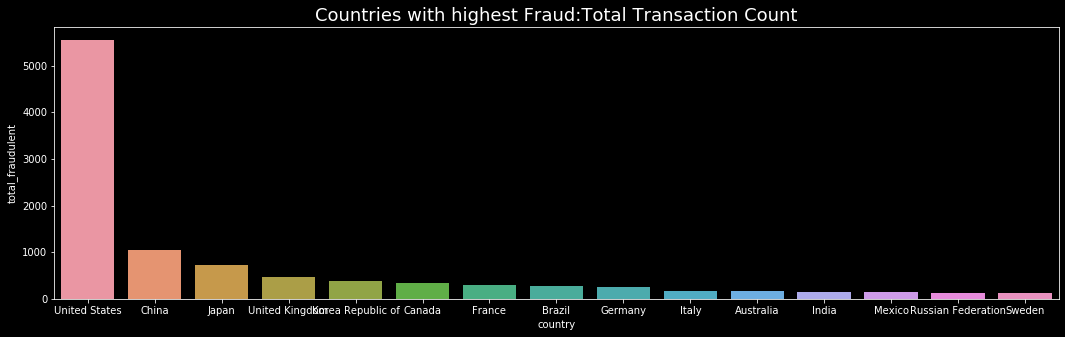

In [77]:
plt.figure(figsize=(18,5))
ax = sns.barplot(rate_df4['country'].head(15),rate_df4['total_fraudulent'].head(15))
ax.set_title("Countries with highest Fraud:Total Transaction Count",fontsize=18)

# Data Transormation

In [14]:
#Ordinalize Source
source_dict = {'SEO':0, 'Ads':1, 'Direct':2}
df.source = df.source.replace(source_dict)

#Ordinalize Browser
browser_dict = {'Chrome':0, 'Opera':1, 'Safari':2, 'IE':3, 'FireFox':4}
df.browser = df.browser.replace(browser_dict)

#Binarize Sex
sex = {'M':0, 'F':1}
df.sex = df.sex.replace(sex)

In [15]:
df

user_id          signup_time        purchase_time  purchase_value  \
0        226648  2015-05-12 16:00:31  2015-06-13 23:42:18              45   
1        103319  2015-02-05 22:20:04  2015-03-29 00:39:07              94   
2         36633  2015-05-10 00:49:53  2015-07-22 03:18:01              46   
3        271176  2015-01-01 04:25:25  2015-01-01 04:25:26              57   
4         77511  2015-01-01 04:25:31  2015-01-01 04:25:32              57   
...         ...                  ...                  ...             ...   
151107   291289  2015-04-05 21:31:06  2015-04-12 04:54:26              18   
151108     6741  2015-08-16 09:46:26  2015-10-24 17:29:39              55   
151109   122422  2015-08-09 14:05:16  2015-09-07 03:15:41              59   
151110   359303  2015-05-10 11:55:20  2015-08-06 10:45:33              49   
151111   142603  2015-05-08 19:20:08  2015-05-23 19:19:02              82   

            device_id  source  browser  sex  age    ip_address  class  \
0       AAALBGNHHVMKG       2        0    0   34  2.494581e+09      0   
1       AAAWIHVCQELTP       1        0    0   29  8.092637e+08      0   
2       AAAXJHWCLISKY       1        3    0   40  2.891497e+06      0   
3       AAAXXOZJRZRAO       1        4    1   36  1.377849e+09      1   
4       AAAXXOZJRZRAO       1        4    1   36  1.377849e+09      1   
...               ...     ...      ...  ...  ...           ...    ...   
151107  ZZZGSIJRNCXBJ       1        2    1   33  2.553895e+09      0   
151108  ZZZIKLJSVSQMF       1        3    0   41  3.265674e+09      0   
151109  ZZZKJIZHJEDFN       2        2    0   33  2.415067e+09      0   
151110  ZZZMVOGBAJVTM       1        0    0   25  3.404179e+09      0   
151111  ZZZXASJUVUNMV       2        0    1   56  4.035154e+09      0   

               country  
0       United Kingdom  
1        United States  
2                  NaN  
3       United Kingdom  
4       United Kingdom  
...                ...  
151107   United States  
151108         Austria  
151109   United States  
151110           Japan  
151111             NaN  

[151112 rows x 12 columns]

In [16]:
labels = df['country'].astype('category').cat.categories.tolist()
labels

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire; Sint Eustatius; Saba',
 'Bosnia and Herzegowina',
 'Botswana',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Congo The Democratic Republic of The',
 'Costa Rica',
 "Cote D'ivoire",
 'Croatia (LOCAL Name: Hrvatska)',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'European Union',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Gree

In [17]:
replace_map = {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}
replace_map

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bermuda': 19,
 'Bhutan': 20,
 'Bolivia': 21,
 'Bonaire; Sint Eustatius; Saba': 22,
 'Bosnia and Herzegowina': 23,
 'Botswana': 24,
 'Brazil': 25,
 'British Indian Ocean Territory': 26,
 'Brunei Darussalam': 27,
 'Bulgaria': 28,
 'Burkina Faso': 29,
 'Burundi': 30,
 'Cambodia': 31,
 'Cameroon': 32,
 'Canada': 33,
 'Cape Verde': 34,
 'Cayman Islands': 35,
 'Chile': 36,
 'China': 37,
 'Colombia': 38,
 'Congo': 39,
 'Congo The Democratic Republic of The': 40,
 'Costa Rica': 41,
 "Cote D'ivoire": 42,
 'Croatia (LOCAL Name: Hrvatska)': 43,
 'Cuba': 44,
 'Curacao': 45,
 'Cyprus': 46,
 'Czech Republic': 47,
 'Denmark': 48,
 'Djibouti': 49,
 'Dominica': 50,
 'Dominican Republic': 51,
 'Ecuador': 

In [18]:
df['country'] = df['country'].replace(replace_map)
df

user_id          signup_time        purchase_time  purchase_value  \
0        226648  2015-05-12 16:00:31  2015-06-13 23:42:18              45   
1        103319  2015-02-05 22:20:04  2015-03-29 00:39:07              94   
2         36633  2015-05-10 00:49:53  2015-07-22 03:18:01              46   
3        271176  2015-01-01 04:25:25  2015-01-01 04:25:26              57   
4         77511  2015-01-01 04:25:31  2015-01-01 04:25:32              57   
...         ...                  ...                  ...             ...   
151107   291289  2015-04-05 21:31:06  2015-04-12 04:54:26              18   
151108     6741  2015-08-16 09:46:26  2015-10-24 17:29:39              55   
151109   122422  2015-08-09 14:05:16  2015-09-07 03:15:41              59   
151110   359303  2015-05-10 11:55:20  2015-08-06 10:45:33              49   
151111   142603  2015-05-08 19:20:08  2015-05-23 19:19:02              82   

            device_id  source  browser  sex  age    ip_address  class  country  
0       AAALBGNHHVMKG       2        0    0   34  2.494581e+09      0    171.0  
1       AAAWIHVCQELTP       1        0    0   29  8.092637e+08      0    172.0  
2       AAAXJHWCLISKY       1        3    0   40  2.891497e+06      0      NaN  
3       AAAXXOZJRZRAO       1        4    1   36  1.377849e+09      1    171.0  
4       AAAXXOZJRZRAO       1        4    1   36  1.377849e+09      1    171.0  
...               ...     ...      ...  ...  ...           ...    ...      ...  
151107  ZZZGSIJRNCXBJ       1        2    1   33  2.553895e+09      0    172.0  
151108  ZZZIKLJSVSQMF       1        3    0   41  3.265674e+09      0      9.0  
151109  ZZZKJIZHJEDFN       2        2    0   33  2.415067e+09      0    172.0  
151110  ZZZMVOGBAJVTM       1        0    0   25  3.404179e+09      0     85.0  
151111  ZZZXASJUVUNMV       2        0    1   56  4.035154e+09      0      NaN  

[151112 rows x 12 columns]

In [19]:
#Fill NaNs with zero
df['country'].fillna(0,inplace=True)

In [20]:
df

user_id          signup_time        purchase_time  purchase_value  \
0        226648  2015-05-12 16:00:31  2015-06-13 23:42:18              45   
1        103319  2015-02-05 22:20:04  2015-03-29 00:39:07              94   
2         36633  2015-05-10 00:49:53  2015-07-22 03:18:01              46   
3        271176  2015-01-01 04:25:25  2015-01-01 04:25:26              57   
4         77511  2015-01-01 04:25:31  2015-01-01 04:25:32              57   
...         ...                  ...                  ...             ...   
151107   291289  2015-04-05 21:31:06  2015-04-12 04:54:26              18   
151108     6741  2015-08-16 09:46:26  2015-10-24 17:29:39              55   
151109   122422  2015-08-09 14:05:16  2015-09-07 03:15:41              59   
151110   359303  2015-05-10 11:55:20  2015-08-06 10:45:33              49   
151111   142603  2015-05-08 19:20:08  2015-05-23 19:19:02              82   

            device_id  source  browser  sex  age    ip_address  class  country  
0       AAALBGNHHVMKG       2        0    0   34  2.494581e+09      0    171.0  
1       AAAWIHVCQELTP       1        0    0   29  8.092637e+08      0    172.0  
2       AAAXJHWCLISKY       1        3    0   40  2.891497e+06      0      0.0  
3       AAAXXOZJRZRAO       1        4    1   36  1.377849e+09      1    171.0  
4       AAAXXOZJRZRAO       1        4    1   36  1.377849e+09      1    171.0  
...               ...     ...      ...  ...  ...           ...    ...      ...  
151107  ZZZGSIJRNCXBJ       1        2    1   33  2.553895e+09      0    172.0  
151108  ZZZIKLJSVSQMF       1        3    0   41  3.265674e+09      0      9.0  
151109  ZZZKJIZHJEDFN       2        2    0   33  2.415067e+09      0    172.0  
151110  ZZZMVOGBAJVTM       1        0    0   25  3.404179e+09      0     85.0  
151111  ZZZXASJUVUNMV       2        0    1   56  4.035154e+09      0      0.0  

[151112 rows x 12 columns]

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['device_id'])
list(le.classes_)

['AAALBGNHHVMKG',
 'AAAWIHVCQELTP',
 'AAAXJHWCLISKY',
 'AAAXXOZJRZRAO',
 'AABFGRPBQHWFQ',
 'AABGCAPIYUWNC',
 'AABJEESQPJHDQ',
 'AABNLBQBKMWRG',
 'AABOMYDURXEQT',
 'AABOOVEJUXMKC',
 'AABOYHXAZBTLZ',
 'AABQZGLRSEYGR',
 'AABVEORDXZXUO',
 'AABZHGGYUMVEQ',
 'AACBIMMVQIFWW',
 'AACEEKSUWDCSU',
 'AACIHTWABTEMZ',
 'AACOSZDJHOJIZ',
 'AACRSKFMHVMCE',
 'AACTNBYQYAVPE',
 'AACUHRZNDEHGI',
 'AACYYBUHPLDWT',
 'AADEPZVZDTXGA',
 'AADGMPYOPXXCX',
 'AADHZIOUTNGHW',
 'AADMHINGHICLN',
 'AADOZLHNCJMMS',
 'AADSJJXNALPUV',
 'AADTALFGPPJOP',
 'AADWLKVTMKVDI',
 'AADZHIAGRGWXX',
 'AAEJIBCSAFDIZ',
 'AAELYFORBLTZB',
 'AAEWGRKQJJMVI',
 'AAEZZOJSFLRNJ',
 'AAFBODGQYEMVK',
 'AAFHFKBPPHJFZ',
 'AAFJFVFQJPUYU',
 'AAFKLTLYBBYMG',
 'AAFPGZIXQHQMW',
 'AAFVPWESOHBGR',
 'AAFYJBAHJYLYZ',
 'AAGFEBWXLTBTP',
 'AAGGGDXSXUFSU',
 'AAGIVWIGPREWM',
 'AAGMOPZROWHED',
 'AAGOBIDATUCBE',
 'AAGOJTXXBLLDB',
 'AAGOPBINPURAP',
 'AAGPVLSWNZAPA',
 'AAGQZFTGQOWLT',
 'AAGVFMPDJZFNA',
 'AAGVZMIBNCPQQ',
 'AAHLUWDWTGOWS',
 'AAHLVXALPWYHA',
 'AAHNJQWU

In [22]:
df['device_id'] = le.transform(df['device_id'])
df

user_id          signup_time        purchase_time  purchase_value  \
0        226648  2015-05-12 16:00:31  2015-06-13 23:42:18              45   
1        103319  2015-02-05 22:20:04  2015-03-29 00:39:07              94   
2         36633  2015-05-10 00:49:53  2015-07-22 03:18:01              46   
3        271176  2015-01-01 04:25:25  2015-01-01 04:25:26              57   
4         77511  2015-01-01 04:25:31  2015-01-01 04:25:32              57   
...         ...                  ...                  ...             ...   
151107   291289  2015-04-05 21:31:06  2015-04-12 04:54:26              18   
151108     6741  2015-08-16 09:46:26  2015-10-24 17:29:39              55   
151109   122422  2015-08-09 14:05:16  2015-09-07 03:15:41              59   
151110   359303  2015-05-10 11:55:20  2015-08-06 10:45:33              49   
151111   142603  2015-05-08 19:20:08  2015-05-23 19:19:02              82   

        device_id  source  browser  sex  age    ip_address  class  country  
0               0       2        0    0   34  2.494581e+09      0    171.0  
1               1       1        0    0   29  8.092637e+08      0    172.0  
2               2       1        3    0   40  2.891497e+06      0      0.0  
3               3       1        4    1   36  1.377849e+09      1    171.0  
4               3       1        4    1   36  1.377849e+09      1    171.0  
...           ...     ...      ...  ...  ...           ...    ...      ...  
151107     137951       1        2    1   33  2.553895e+09      0    172.0  
151108     137952       1        3    0   41  3.265674e+09      0      9.0  
151109     137953       2        2    0   33  2.415067e+09      0    172.0  
151110     137954       1        0    0   25  3.404179e+09      0     85.0  
151111     137955       2        0    1   56  4.035154e+09      0      0.0  

[151112 rows x 12 columns]

In [23]:
# df.to_csv('Frau Detection/data/data_transformed_v1.csv', index=False)